In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_land_use_no_gdal as rlu
import scripts.read_image_data_scaleable as rid
import datetime

In [2]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data_scaleable' from '../scripts/read_image_data_scaleable.py'>

In [3]:
area = 'area3'
image_dir='../%s/2014/images/' % area
mask_dir='../%s/2014/masks/' % area
table_dir='../%s/2014/tables/LC8_SR.csv' % area
new_table_dir='../%s/2015/tables/LC8_SR.csv' % area
shelve_root_dir='../models/%s/shelves/' % area
processes=8
max_days_apart=60
step=250000

In [4]:
rid.create_folders(shelve_root_dir)

In [5]:
maps = rid.read_image_data(image_dir, mask_dir, table_dir, shelve_root_dir + 'old/', processes)

In [6]:
# first = next(iter(maps.keys()))
# map0 = np.memmap(shelve_root_dir + 'old/maps/' + first, mode='r', dtype='int16', shape=maps[first])
# map0

In [7]:
# res = ds[list(ds.keys())[0]].shape[1:]
res = maps[next(iter(maps.keys()))][1:]
new_table = pd.read_csv(new_table_dir)
new_times = list(new_table['system:time_start'])
times_to_fit = []
for t in new_times:
    dt = datetime.datetime.fromtimestamp(t / 1000)
    dt = dt.replace(year=dt.year - 1)
    times_to_fit += [int(dt.timestamp() * 1000)]
times_to_fit.sort()

In [8]:
# times_to_fit[:5]

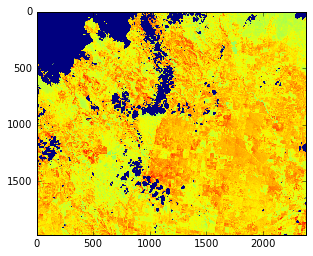

In [9]:
img0 = rid.interpolate(times_to_fit[20], maps, max_days_apart=30, shelve_dir=shelve_root_dir + 'old/', processes=8, 
                       block_size=500)
plt.imshow(img0[0, :, :])

In [10]:
imgs = rid.interpolate_images(times_to_fit, maps, max_days_apart, processes, shelve_root_dir + 'old/', 500)

Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7f32a50dd390>>
Exception ignored in: <bound method Shelf.__del__ of <shelve.DbfilenameShelf object at 0x7f32a50dd048>>


In [11]:
maps.close()
imgs.close()